In [18]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.
/Users/felixgeorge/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/felixgeorge/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/felixgeorge/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/felixgeorge/opt/ana

In [65]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [77]:
def prepare_data():
    dat=[]
    frames=os.listdir('data')
    for i in frames:
        try:
            temp=cv2.imread('data/'+i,0)
            t=cv2.resize(temp,(28,28))
            dat.append(t)
        except Exception as e:
            continue
    return dat

In [82]:
input_img = Input(shape=(28, 28, 1))

In [83]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [78]:
data=prepare_data()

In [99]:
x=[]
for i in data:
    if np.array(i).shape==(28,28):
        x.append(np.array(i/255))
x=np.array(x)
x.shape

(200, 28, 28)

In [100]:
x.shape

(200, 28, 28)

In [101]:
x=np.reshape(x,(len(x),28,28,1))
y=np.reshape(x[:5],(len(x[:5]),28,28,1))

In [102]:
autoencoder.fit(x, x,epochs=50,shuffle=True,validation_data=(y,y))


Train on 200 samples, validate on 5 samples
Epoch 1/50
200/200 [==============================] - 3s 15ms/step - loss: 0.6908 - val_loss: 0.6869
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.6712 - val_loss: 0.6643
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.6371 - val_loss: 0.6508
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.6296 - val_loss: 0.6467
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.6254 - val_loss: 0.6384
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.6260 - val_loss: 0.6504
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.6237 - val_loss: 0.6530
Epoch 8/50
200/200 [==============================] - 1s 3ms/step - loss: 0.6206 - val_loss: 0.6750
Epoch 9/50
200/200 [==============================] - 1s 3ms/step - loss: 0.6243 - val_loss: 0.6252
Epoch 10/50
200/200 [==============================] -

In [104]:
decoded_imgs = autoencoder.predict(y)

In [109]:
a=decoded_imgs[0].reshape(28,28)

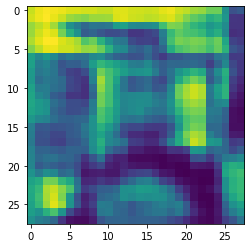

In [110]:
plt.imshow(a)

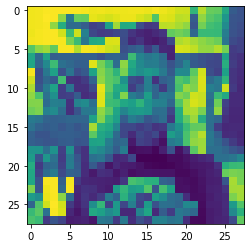

In [111]:
plt.imshow(x[0].reshape(28,28))